# DFT SENOIDAL
#### Lucas Liaño

En este ejercicio vamos a generar una función para calcular manualmente la Transformada Discreta de Fourier (DFT).

Para ello vamos a implementar la fórmula:

$$\begin{equation} F[k] = \sum_{n=0}^{N-1} f[n] \cdot e^{-j \dfrac{2\pi n k}{N}}\ ;\ k = 0,1,2,3,\dots,N-1 \end{equation}$$

Luego se implementará dicha función en una función senoidal, aprovechando el generador de funciones ya construido.

Para finalizar se comparara la misma con la función _fft()_

In [11]:
#Se importan libreriras adecuadas
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#Se importa la función generadora de señales senoidales
def my_sen(vmax = 1,  freq = 1, dc = 0, phi = 0, N = 64, fs = 100):
    Vp = vmax #Volts
    wo = 2 * np.pi * freq #rads/s
    Ts = 1 / fs
    
    t = np.arange(0, N*Ts, Ts)
    f = Vp * (np.sin(wo * t + phi)) + dc
    
    return t,f

In [13]:
#Se crea la función DFT
def myDFT(f, N):
    #Primero debemos crear el dominio complejo (k) y las funciones exponenciales que participaran
    
    # Nota 2pi/N = W es una resolución espectral normalizada, pero que no es la real que vas a utilizar para representar.
    # Los criterios de normalización son para calcular la DFT con n y k matrices naturales de 0 a N-1
    
    
    k = np.arange(0,N).astype(int)
    
    n = np.arange(0,N).astype(int)   #Calculamos la base temporal discreta

    Fk = np.zeros(N).astype(complex)    #Generamos un vector vacio con la salida
    
    Wkn = np.zeros([n.size,k.size], dtype = complex)    #k va de 0 a N-1 y n lo mismo
   
    index = 0
    for kloop in k:
        Wkn[:,kloop] = np.exp( -1j * (2*np.pi/N) * kloop * n)
        index += 1
    
    Fk = np.matmul(Wkn,f)
    

        
    return k, Fk


In [14]:
# Se simula el comportamiento

N = 100
fs = 100
W = fs / (N) #Resolución espectral


tt,ff = my_sen(1, 10, 0, np.pi, N, fs)


k,Fk = myDFT(ff, N)

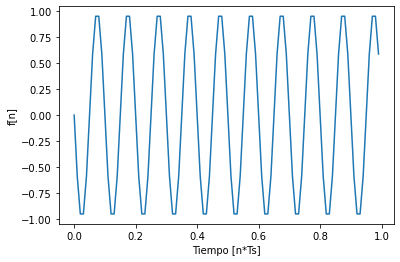

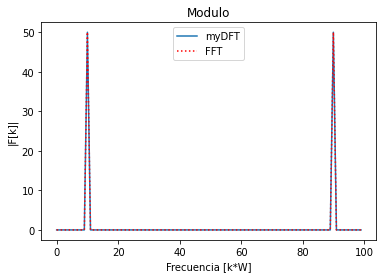

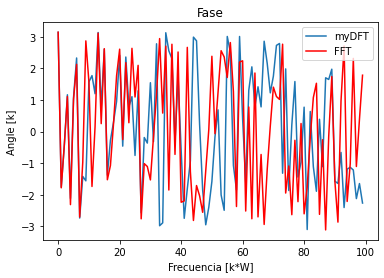

In [15]:
# Plotting time

plt.figure(1)
plt.plot(tt, ff)
plt.xlabel('Tiempo [n*Ts]')
plt.ylabel('f[n]')

fig, ax1 = plt.subplots(1,1)  
ax1.plot(k*W, np.abs(Fk), label='myDFT')  
ax1.plot(k*W, np.abs(np.fft.fft(ff,N)), label='FFT', ls=':', color='r')  
ax1.set_xlabel('Frecuencia [k*W]')  
ax1.set_ylabel('|F[k]|')  
ax1.set_title("Modulo") 
ax1.legend()  

fig, ax2 = plt.subplots(1,1)  
ax2.plot(k*W, np.angle(Fk), label='myDFT')  
ax2.plot(k*W, np.angle(np.fft.fft(ff,N)), label='FFT', ls='-', color='r')  
ax2.set_xlabel('Frecuencia [k*W]')  
ax2.set_ylabel('Angle [k]')  
ax2.set_title("Fase") 
ax2.legend()  

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Como podemos observar las fases no coinciden. Esto se puede dar por la resolución numérica de los algoritmos. Al tomar valores cercanos a cero pero no iguales a cero, la fase, que se calcula como $arctg(\dfrac{y}{x})$ para un numero $Z = x + jy$, va a tomar valores arbitrarios por ser comparable las magnitudes de los valores proximos a cero.
</div>

In [16]:
# Implementamos otra versión donde recortamos los valores mas pequeños de la DFT
def myDFT(f, N):
    #Primero debemos crear el dominio complejo (k) y las funciones exponenciales que participaran
    
    # Nota 2pi/N = W es una resolución espectral normalizada, pero que no es la real que vas a utilizar para representar.
    # Los criterios de normalización son para calcular la DFT con n y k matrices naturales de 0 a N-1
    
    
    k = np.arange(0,N).astype(int)
    
    n = np.arange(0,N).astype(int)   #Calculamos la base temporal discreta

    Fk = np.zeros(N).astype(complex)    #Generamos un vector vacio con la salida
    
    Wkn = np.zeros([n.size,k.size], dtype = complex)    #k va de 0 a N-1 y n lo mismo
   
    index = 0
    for kloop in k:
        Wkn[:,kloop] = np.exp( -1j * (2*np.pi/N) * kloop * n)
        index += 1
    
    Fk = np.matmul(Wkn,f)
    
    index = 0
    for each in Fk:
        if np.abs(each) < 1e-12:
            Fk[index] = 0 + 0j
        index += 1
            

        
    return k, Fk

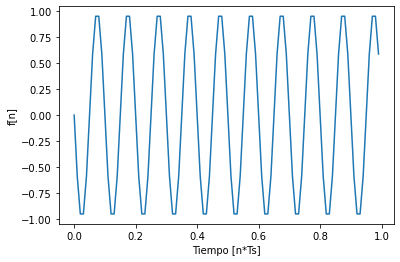

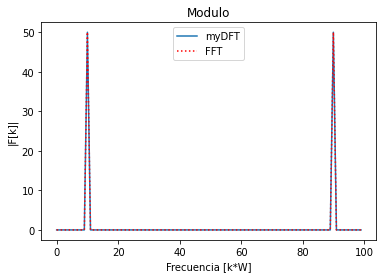

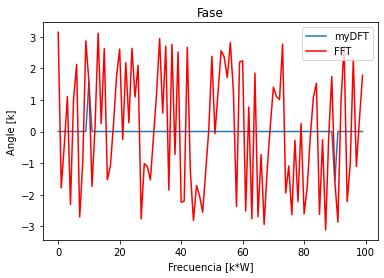

In [18]:
tt,ff = my_sen(1, 10, 0, np.pi, N, fs)


k,Fk = myDFT(ff, N)




plt.figure(1)
plt.plot(tt, ff)
plt.xlabel('Tiempo [n*Ts]')
plt.ylabel('f[n]')


fig, ax1 = plt.subplots(1,1)  
ax1.plot(k*W, np.abs(Fk), label='myDFT')  
ax1.plot(k*W, np.abs(np.fft.fft(ff,N)), label='FFT', ls=':', color='r')  
ax1.set_xlabel('Frecuencia [k*W]')  
ax1.set_ylabel('|F[k]|')  
ax1.set_title("Modulo") 
ax1.legend()  

fig, ax2 = plt.subplots(1,1)  
ax2.plot(k*W, np.angle(Fk), label='myDFT')  
ax2.plot(k*W, np.angle(np.fft.fft(ff,N)), label='FFT', ls='-', color='r')  
ax2.set_xlabel('Frecuencia [k*W]')  
ax2.set_ylabel('Angle [k]')  
ax2.set_title("Fase") 
ax2.legend()  

En este caso vemos que el resultado de myDFT tiene fases correspondientes a la transformada del seno, como corresponde a una transformada continua.